# Data Science Toolbox: Literature Review
By Shanglin Zou and Daniel Jones

We chose to divide the work equally, resulting in a corresponding split of equity:
  - Shanglin Zou: 50%
  - Daniel Jones: 50%

---


As part of a literature review, our key aim was to survey both the current and historical landscape of data science and it's relation to cyber-security. This covers a broad set of topics, which we broke down into the following three categories [1]:
  1. Classical Statistics
  2. Machine Learning
  3. Neural Networks
  
We will aim to implement approaches from a couple of these fields in the practical part of this report.
 
TODO: talk about literature

Survey papers:
  - https://ieeexplore.ieee.org/abstract/document/7307098/
  - https://www.sciencedirect.com/science/article/pii/S108480451200183X

### What are the broad types of data?

- Network Analysis
  - Common in this area
  - secrepo.com provides a number of resources. e.g. http://www.secrepo.com/Datasets%20Description/Network/http.html and http://www.secrepo.com/Datasets%20Description/Network/weird.html
     - these use the [bro](https://www.bro.org/) log file format describe here: http://gauss.ececs.uc.edu/Courses/c6055/pdf/bro_log_vars.pdf
     - bro citation:
     > 
    Vern Paxson
    Bro: A System for Detecting Network Intruders in Real-Time
    Computer Networks, 31(23—24), pp. 2435-2463, 1999.
    ([BibTeX](https://www.bro.org/research/bro99.bib)) ([PDF](http://www.icir.org/vern/papers/bro-CN99.pdf))
- Log Files
    
- Program Execution Traces:
   - Stochastic Identification of Malware with Dynamic Traces (https://arxiv.org/pdf/1404.2462.pdf): Using program runtime traces as a data source and applying Markov chains to classify them as malware. These files are generated and can be read by https://github.com/moyix/panda-malrec (B. Dolan-Gavitt, J. Hodosh, P. Hulin, T. Leek, R. Whelan. Repeatable Reverse Engineering with PANDA. 5th Program Protection and Reverse Engineering Workshop, Los Angeles, California, December 2015.)



### What are the main types of resource?
We looked at:  books, papers, online tutorials, public code and data repositories.

Books:
 - "Introduction to Machine Learning"
 
Papers:
 
 - "Visual Analytics for Model Selection in Time Series Analysis"
 
Take-aways:
  - There are lots of resources on statistics, machine learning and neural networks (within books, papers and online resources) but not many that apply this to cyber-security.
  - secrepo.com proved a valuable resource for both data sets, and analysis of those data sources.
  - academic papers provided a combination of the two (stats applied to cyber-security data) but code samples were hard to come by
  
  
### What type of problems can the resources solve?
- The paper,"Visual Analytics for Model Selection in Time Series Analysis", helps us solve Time Series modelling, and we also need to find some code samples to help our project.
### Are there any generic data science resources that might be applicable? In what sense are they applicable?
Since there is little introductory material on data science applied to cyber-security, the generic data science resources proved useful to learn the theory behind it's application. Approach: read papers with direct application to cyber-security, and use generic data science resources to fill in knowledge gaps.

"Introduction to Machine learning" proved to be a useful reference text to learn about k-Nearest-Neighbors classification, since the papers applying it to cyber-security assumed knowledge of the algorithm as a pre-requisite.

"Visual Analytics for Model Selection in Time Series Analysis" is a good paper to learn model selection in Time series Analysis. The paper shows the steps we need to do when we try to model a time series data. 


### How might the approach be compared to other approaches, and/or applied across different datasets?
For time series approach, we can easily apply it across different datasets. Resampling, testing stationary, differencing, model selection, fitting and prediction are the steps we need to do. However, i think it does not work for analyzing string data(i.e Ip address, Id).

## Time-Series Analysis


## Classification
(k-NN)

# References
[1]: [Data Science Toolbox, Lecture 01](https://www.ole.bris.ac.uk/bbcswebdav/pid-3554286-dt-content-rid-9984867_2/xid-9984867_2). Daniel Lawson.

# Time Series analysis of HTTP Bro Log

Time Series is a good techqiue that we can use for Cybersecurity data since all the actions in cyber is related to the time.

In [1]:
%matplotlib notebook
import pandas as pd


## Data input

In [2]:
http_df = pd.read_csv("resources/http.log.zip", header=None, sep="\t", 
                      names=['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'trans_depth', 'method', 'host', 'uri', 'referrer', 
                             'user_agent', 'request_body_len', 'response_body_len', 'status_code', 'status_msg', 'info_code', 'info_msg', 'filename', 'tags', 
                             'username', 'password', 'proxied', 'orig_fuids', 'orig_mime_types', 'resp_fuids', 'resp_mime_types', 'sample']) 
#resources from http://www.secrepo.com/Datasets%20Description/Network/http.html
http_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
0,1.338423e+09,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,1,GET,myfecm.com,/,...,-,(empty),-,-,-,-,-,FmrItE3tE6uWAdmZV,text/html,NaN
1,1.338423e+09,CKH7Eu1pUtdXF8KKq8,192.168.88.10,1031,50.28.53.156,80,1,GET,www.daysofyorr.com,/release.js,...,-,(empty),-,-,-,-,-,FyKJaS1eo05A7BfpRj,text/plain,NaN
2,1.338423e+09,CMjfL821GNMgnPFTa9,192.168.88.10,1034,188.72.248.160,80,1,GET,potialosce.tk,/25433658.html,...,-,(empty),-,-,-,-,-,FzLBH53sLcK6bEiRai,text/html,NaN
3,1.338423e+09,Ckt4Bw4pZVSaU17gSg,192.168.88.10,1035,69.63.148.95,80,1,GET,www.12secondcommute.com,/common/formValidation.js,...,-,(empty),-,-,-,-,-,F6UaIl1po975GOkGJh,text/plain,NaN
4,1.338423e+09,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,2,GET,myfecm.com,/button_bg6.jpg,...,-,(empty),-,-,-,-,-,FjxdXz2z8deZMyEdvb,image/jpeg,NaN


## Timestamp

In [3]:
#clean up the timestamp column ts
from datetime import datetime
http_df['ts'] = [datetime.fromtimestamp(float(date)) for date in http_df['ts'].values]
http_df = http_df.set_index('ts')
http_df.head()
# code provided by https://github.com/sooshie/Security-Data-Analysis/blob/master/Lab_2/Lab_2-Solutions.ipynb

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
ts,,,,,,,,,,,,,,,,,,,,,
2012-05-31 01:09:27.177343,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,1,GET,myfecm.com,/,-,...,-,(empty),-,-,-,-,-,FmrItE3tE6uWAdmZV,text/html,NaN
2012-05-31 01:09:28.343725,CKH7Eu1pUtdXF8KKq8,192.168.88.10,1031,50.28.53.156,80,1,GET,www.daysofyorr.com,/release.js,http://myfecm.com/,...,-,(empty),-,-,-,-,-,FyKJaS1eo05A7BfpRj,text/plain,NaN
2012-05-31 01:09:29.124170,CMjfL821GNMgnPFTa9,192.168.88.10,1034,188.72.248.160,80,1,GET,potialosce.tk,/25433658.html,http://myfecm.com/,...,-,(empty),-,-,-,-,-,FzLBH53sLcK6bEiRai,text/html,NaN
2012-05-31 01:09:29.142869,Ckt4Bw4pZVSaU17gSg,192.168.88.10,1035,69.63.148.95,80,1,GET,www.12secondcommute.com,/common/formValidation.js,http://myfecm.com/,...,-,(empty),-,-,-,-,-,F6UaIl1po975GOkGJh,text/plain,NaN
2012-05-31 01:09:29.602005,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,2,GET,myfecm.com,/button_bg6.jpg,http://myfecm.com/,...,-,(empty),-,-,-,-,-,FjxdXz2z8deZMyEdvb,image/jpeg,NaN


## Graphing time series data

We focus on two cols, which are request_body_len and response_body_len

<IPython.core.display.Javascript object>


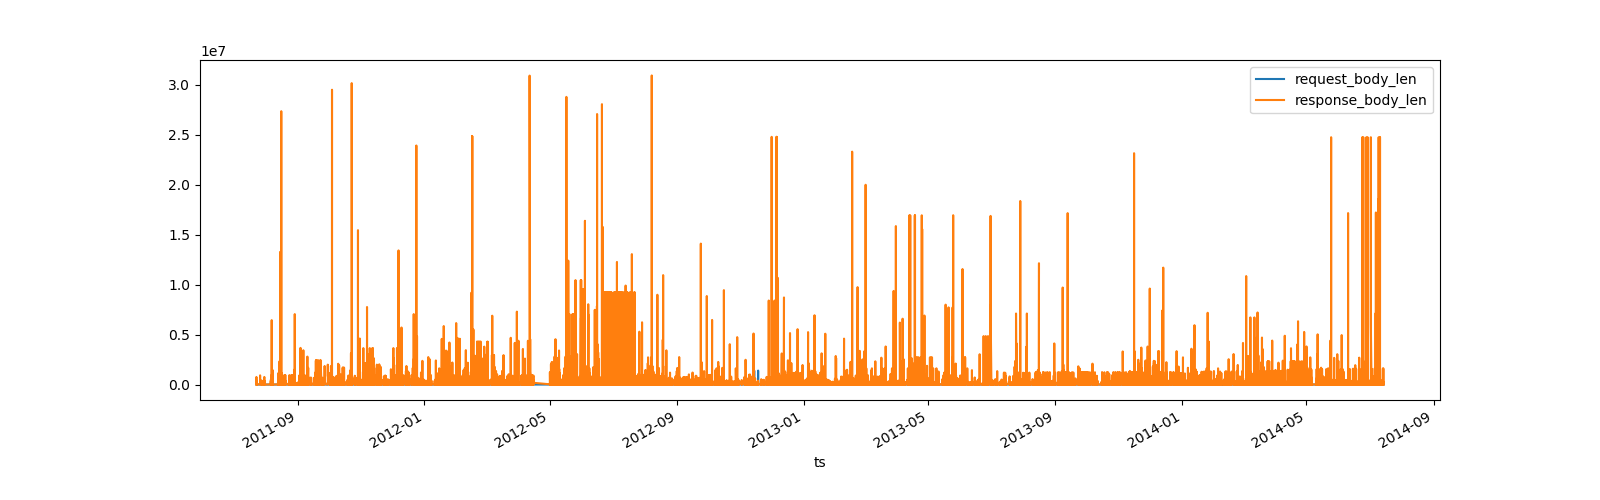

array([      0,       1,       2, ...,  507884,  548040, 1397301],
      dtype=int64)

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (16.0, 5.0)
df = http_df[['request_body_len','response_body_len']]
df.plot()
df.head
np.unique(df['request_body_len'])
# request_body_len means Actual uncompressed content size of the data transferred from the client
# response_body_len means Actual uncompressed content size of the data transferred from the server  
# code provided by https://github.com/sooshie/Security-Data-Analysis/blob/master/Lab_2/Lab_2-Solutions.ipynb
# If the figure doesn't show up, just rerun this single cell

The figure above shows the actual umcompressed content size of data from the client and server at the end of month. You can see that blue line is very tiny which means comparing to response, it has very small amount of data size transferred.

## Resamping data

C:\Users\seeml\Miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


<IPython.core.display.Javascript object>


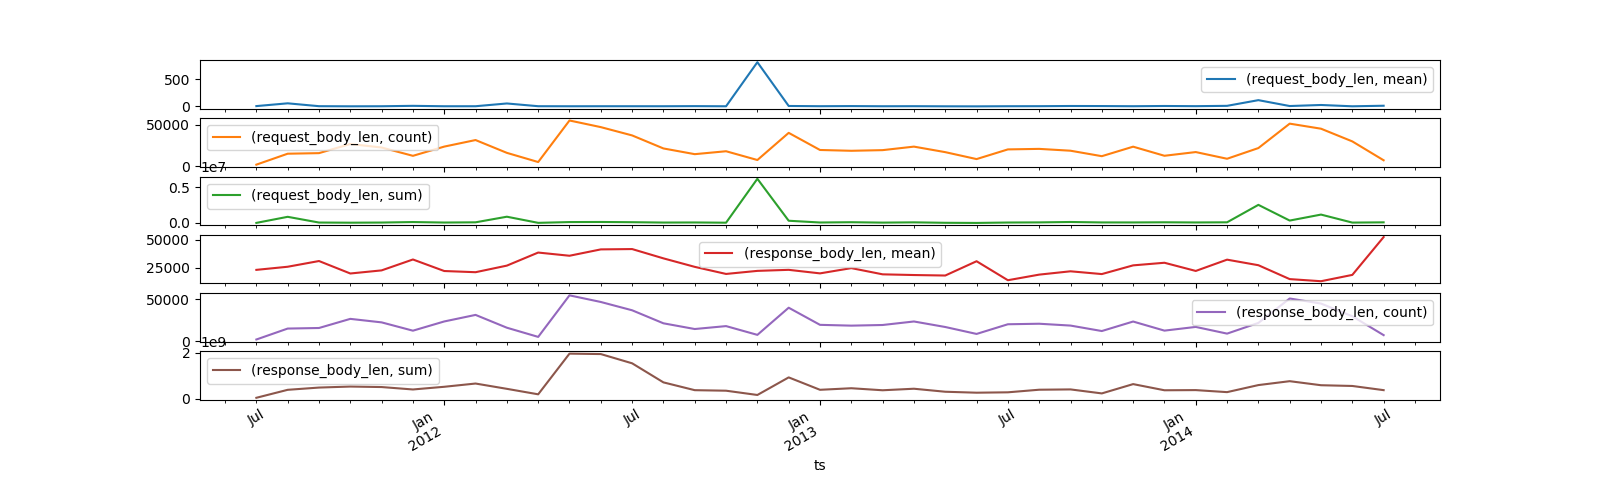

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F17A847B8>,
      dtype=object)

In [11]:
%matplotlib notebook
resamp = df.resample("M", how=['mean', 'count', 'sum']) #"M" means month end frequency
resamp.plot(subplots=True)
# code provided by https://github.com/sooshie/Security-Data-Analysis/blob/master/Lab_2/Lab_2-Solutions.ipynb
# If the figure doesn't show up, just rerun this single cell

The graph shows that the data that resampled by mean, number of count, total data size at the end of month

<IPython.core.display.Javascript object>


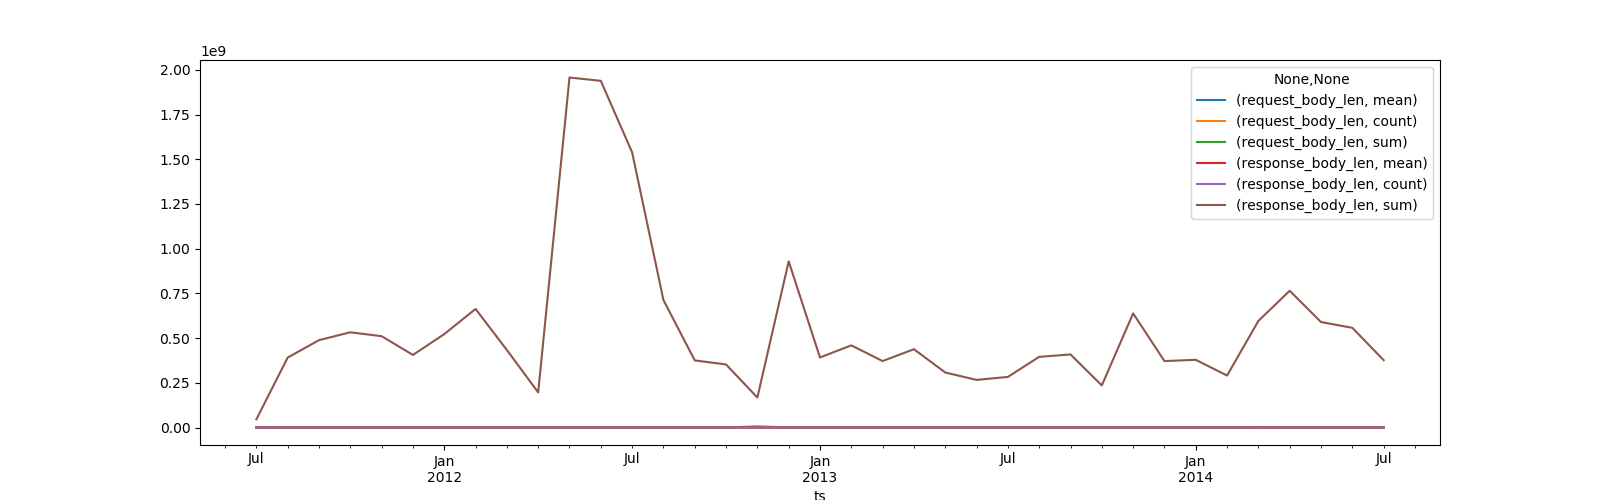

In [12]:
resamp.plot()
# If the figure doesn't show up, just rerun this single cell

Times Series Model-- ARIMA(p,d,q)
https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

using ACF and PACF to determine p and q.
https://onlinecourses.science.psu.edu/stat510/node/62/

ACF and PACF
https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

Code for ACF and PACF
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

Python code for time series
https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

## Try modelling the count of response_body_len

ARIMA model is combined by two models which are Autoregressive Model(AR) and Moving Average Model(MA)
To determine the order of the model, i.e ARMA(p,d,q), p and q are the orders of the model, we need to plot the autocorrelation function plot(acf) to determine q, and partial autocorrelation function(pacf) plot to get p's value. d is differencing, in statistics is a transformation applied to time-series data in order to make it stationary. 

Since the big value of data, we need to take logarithm to our data and difference the data to make it stationary.

In [21]:
resamp['response_count_log']=resamp['response_body_len']['count'].apply(np.log) 
resamp['response_count_log_diff'] = resamp['response_count_log'] - resamp['response_count_log'].shift()
resamp1 = resamp['response_count_log_diff'][1:]
resamp1


ts
2011-08-31    2.034742
2011-09-30    0.044066
2011-10-31    0.527124
2011-11-30   -0.171305
2011-12-31   -0.584222
2012-01-31    0.631965
2012-02-29    0.287301
2012-03-31   -0.669599
2012-04-30   -1.150190
2012-05-31    2.376477
2012-06-30   -0.156341
2012-07-31   -0.238115
2012-08-31   -0.548254
2012-09-30   -0.385888
2012-10-31    0.215774
2012-11-30   -0.873797
2012-12-31    1.672008
2013-01-31   -0.717815
2013-02-28   -0.050379
2013-03-31    0.040721
2013-04-30    0.196952
2013-05-31   -0.329510
2013-06-30   -0.673942
2013-07-31    0.851172
2013-08-31    0.030339
2013-09-30   -0.111386
2013-10-31   -0.432349
2013-11-30    0.662917
2013-12-31   -0.622580
2014-01-31    0.301588
2014-02-28   -0.636256
2014-03-31    0.884022
2014-04-30    0.849849
2014-05-31   -0.126273
2014-06-30   -0.412355
2014-07-31   -1.419717
Freq: M, Name: response_count_log_diff, dtype: float64

<IPython.core.display.Javascript object>


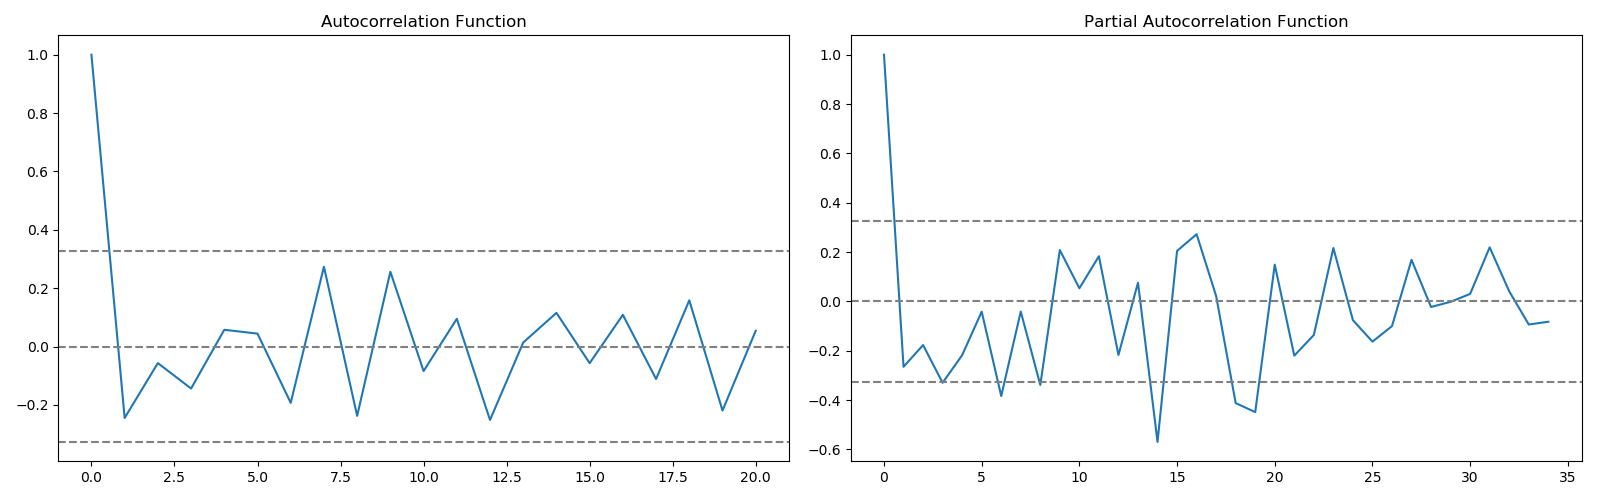

In [10]:
%matplotlib notebook
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(resamp1, nlags=20)
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(resamp1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(resamp1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
lag_pacf = pacf(resamp1, nlags=34, method='ols')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(resamp1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(resamp1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/ acf and pacf codes

By the acf plot, we can get q's value. Q's value depends on how many lags that are beyond the boundaries in the first time. [1]

According to this plot, we can get that lag 1 is above the boundaries, so we can say that q is equal to 1.

Similarly, we can use pacf to determine the p value by the same way. By the plot, we can get p is equal to 1.

Also, we difference the data once, we can say d = 1.

Therefore we could say that it is a ARIMA model with p=1, q=1, d=1

## Fit model and predict

### Set Train and Test data

we have 37 months of data, we set first 34 months as training data, and last 3 months as test data.

In [8]:
#train data
train = resamp1[0:33]
test = resamp1[33:36]

ts
2011-08-31    2.034742
2011-09-30    0.044066
2011-10-31    0.527124
2011-11-30   -0.171305
2011-12-31   -0.584222
2012-01-31    0.631965
2012-02-29    0.287301
2012-03-31   -0.669599
2012-04-30   -1.150190
2012-05-31    2.376477
2012-06-30   -0.156341
2012-07-31   -0.238115
2012-08-31   -0.548254
2012-09-30   -0.385888
2012-10-31    0.215774
2012-11-30   -0.873797
2012-12-31    1.672008
2013-01-31   -0.717815
2013-02-28   -0.050379
2013-03-31    0.040721
2013-04-30    0.196952
2013-05-31   -0.329510
2013-06-30   -0.673942
2013-07-31    0.851172
2013-08-31    0.030339
2013-09-30   -0.111386
2013-10-31   -0.432349
2013-11-30    0.662917
2013-12-31   -0.622580
2014-01-31    0.301588
2014-02-28   -0.636256
2014-03-31    0.884022
2014-04-30    0.849849
Freq: M, Name: response_count_log_diff, dtype: float64

In [23]:
# ARIMA
from statsmodels.tsa.arima_model import ARIMA
# fit model p=1, q=1,d=1
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(disp=False)
# test the data
yhat = model_fit.predict(len(train),(len(resamp1)))
print(yhat) #this is the predicted value of differencing log data, and need to take it back to orignal scale.
#convert to log scale first
new = train.append(yhat)
new_cumsum = new.cumsum()
new_cum = pd.Series(resamp['response_count_log'][0], index= resamp['response_count_log'].index)
new_cum = new_cum.add(new_cumsum,fill_value=0)
new_cum[37]= new_cum[37] + resamp['response_count_log'][0]
#convert to orignal scale
np.exp(new_cum)[-1:]



2014-05-31   -1.187208
2014-06-30    0.397525
2014-07-31   -0.142294
2014-08-31    0.041589
Freq: M, dtype: float64


2014-08-31    20994.41596
dtype: float64

Here is what we predict for August 2014.

In [25]:
np.exp(new_cum)[-4:-1]
#shows the fitted data from May 2014 to July 2014.

2014-05-31    15602.587843
2014-06-30    23218.799221
2014-07-31    20139.195595
dtype: float64

In [26]:
resamp['response_body_len']['count'][-3:]
#actual data from May 2014 to July 2014.

ts
2014-05-31    45077
2014-06-30    29845
2014-07-31     7216
Freq: M, Name: count, dtype: int64

Here is fitted data and test data. they actually have the big difference here. It may cause some problems. Maybe the model is not that good? 
Also, I think I skipped one step is checking the stationary of data, this is also what i need to notice next time. 
Besides this, this is basic way how we model a data using time series method.
Using programing to analyze data is a good combination of classical statistics and modern machine learning. 

## ARIMA(1,1,1)
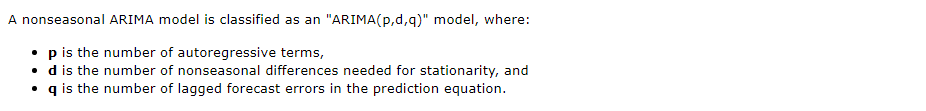
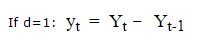

## Reference
[1]:Markus Bogl, Wolfgang Aigner, Peter Filzmoser, Tim Lammarsch, Silvia Miksch, and Alexander Rind. Visual Analytics for Model Selection in Time Series Analysis, 2013 

# Static Analysis and Classification of Zeus Malware

The paper "Unveiling Zeus: automated classification of malware samples" [0] surveys a number of classification methods to differentiate binaries in the [Zeus malware family](https://en.wikipedia.org/wiki/Zeus_%28malware%29) from other types of malware. The paper used the `auto-mal` tool to perform [dynamic analysis](https://en.wikipedia.org/wiki/Dynamic_program_analysis) of the binaries as they run, creating a set of sixty-five features for each binary sample. A number of classification methods were applied and their accuracy compared.

Here, the methodology above is applied to a data set generated from [static analysis](https://en.wikipedia.org/wiki/Static_program_analysis) of malware binaries.

In [ ]:
%matplotlib notebook

import numpy
import pandas
import seaborn
import matplotlib

from sklearn import metrics
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import model_selection

In [ ]:
random_state = numpy.random.RandomState(0)

## Data Import

Source the data set from static analysis of three different families of malware:
  1. [Zeus](https://en.wikipedia.org/wiki/Zeus_%28malware%29)
  1. [Operation Cleaver](https://en.wikipedia.org/wiki/Operation_Cleaver)
  1. [APT-1](https://www.fireeye.com/content/dam/fireeye-www/services/pdfs/mandiant-apt1-report.pdf)
  
The following uses pre-analysed files, sourced from Mike Sconzo at [SecRepo](https://secrepo.com) under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

In [ ]:
zeus = pandas.read_csv("resources/Zeus.csv")  # sourced from http://www.secrepo.com/Datasets%20Description/PE_malware/Zeus.html
zeus['Source'] = 'zeus'
zeus.describe().transpose()

In [ ]:
zeus.describe(include=numpy.object).transpose()

In [ ]:
op_cleaver = pandas.read_csv("resources/OPCleaver.csv")  # sourced from http://www.secrepo.com/Datasets%20Description/PE_malware/OPCleaver.html
op_cleaver['Source'] = 'op_cleaver'
op_cleaver.describe().transpose()

In [ ]:
op_cleaver.describe(include=numpy.object).transpose()

In [ ]:
virus_share = pandas.read_csv("resources/VirusShare.csv")  # sourced from http://www.secrepo.com/Datasets%20Description/PE_malware/VirusShare.html
virus_share['Source'] = 'virus_share'
virus_share.describe().transpose()

In [ ]:
virus_share.describe(include=numpy.object).transpose()

The above data sets show 11 numerical features and 2 categorical (with the `Source` column added at import time). There is little documentation on how these features have been generated. They are a combination of PE file headers (e.g.`SectionAlignment` ), and further analysis (e.g. `HighEntropy`).

### Initial Analysis

TODO: plot a few relations between features.

### Data Cleanup

The Zeus and Operation Cleaver data sets both have the column "SizeOfHeaders.1", which is missing from the APT-1/VirusShare data set. Check that these are duplicates of the "SizeOfHeaders" column, then delete them:

In [ ]:
if all(zeus['SizeOfHeaders'] == zeus['SizeOfHeaders.1']):
    del zeus['SizeOfHeaders.1']

In [ ]:
if all(op_cleaver['SizeOfHeaders'] == op_cleaver['SizeOfHeaders.1']):
    del op_cleaver['SizeOfHeaders.1']

There is a large size disparity between the three data sets. Combine the Operation Cleaver and Virus Share data sets to create a single data set with 392 non-Zeus samples.

In [ ]:
non_zeus = op_cleaver.append(
    virus_share, 
    ignore_index=True,  # generate new indexes for the virus_share set
)
non_zeus['Source'] = 'non-zeus'

## Preparation of the data sets

To mirror the work in the paper we will use an equal number of Zeus and non-Zeus samples in the learning data. Since the Zeus data set is much larger than that of the non-Zeus data set, take a random sample of the same size.

In [ ]:
zeus = zeus.sample(n=len(non_zeus), random_state=random_state)
len(zeus)

Now we need to split the data into training and testing sets. Inline with the paper, keep 10% of the data for testing. When doing this, we sample separately from the Zeus and non-Zeus data, this ensures the same number of Zeus and non-Zeus data points will be used during training and testing.

In [ ]:
zeus_training = zeus.sample(frac=0.9, random_state=random_state)
zeus_testing = zeus.drop(index=zeus_training.index)

len(zeus_training), len(zeus_testing)

In [ ]:
non_zeus_training = non_zeus.sample(frac=0.9, random_state=random_state)
non_zeus_testing = non_zeus.drop(index=non_zeus_training.index)

len(non_zeus_training), len(non_zeus_testing)

Mix up the zeus and non-zeus data sets, making sure to extract the 'Source' columns so they are excluded from modelling. Save these known classifications in a separate variable. This will be used during the training stage to map each entry to it's group, and the testing stage to determine the accuracy of the model.

In [ ]:
training_set = zeus_training.append(non_zeus_training, ignore_index=True)
training_source = training_set['Source']
del training_set['Source']

In [ ]:
testing_set = zeus_testing.append(non_zeus_testing, ignore_index=True)
testing_source = testing_set['Source']
del testing_set['Source']

The paper evaluates four methods of classifying binaries:
  1. Support Vector Classification/Machines
  2. Logistic Regression
  3. Classification/Decision Trees
  4. k-Nearest Neighbors (k-NN)
  
We have chosen to implement the k-NN approach described in the paper, due to it's ease of implementation using modern machine learning toolkits. In this case, we will use the `KNeighbors` classifier from [scikit-learn](http://scikit-learn.org) [1].

## k-Nearest-Neighbours
Resources:
  - http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html
  - https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
  - https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
  
Resources for explanation:
  - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4916348/
  - https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/ (slick)
  - [2]: E. Alpaydin. Introduction to machine learning. MIT press, 2004
  
  
The book "Introduction to machine learning" [2]  ... TODO

non-parametric estimation: only key assumption is that similar inputs hav similar outputs

lazy learning algorithm

how does this differ from other non-parametric estimators, is this particularly applicable to the data?

Nice diagram. Can I find a GIF that shows the process?
  - http://davpinto.com/ml-simulations/#k-nearest-neighbors-classifier
  - 

Potential Advantages:
  - There is no distinct training phase, so it can be set up to constantly learn in the field (iteratively improving our model as time goes on
  - 
  
  
Potential Disadvantages:
  - 

### Categorical values

The k-NN algorithm can only be used on numeric values (since it needs to take a distance metric). For each categorical column in the data set we should either remove it, or map it into a numeric space:

#### FileName
These values don't seem to be the natural filename the binaries were distributed as, and are instead a concatentation of the malware type (e.g. 'zeusbin') and a hash. This column should be removed since it gives the game away slightly.

In [ ]:
del training_set['FileName']
del testing_set['FileName']

#### TimeDateStamp
This can easily be mapped into a UNIX epoch, which should allow computing sane distances between times.


In [ ]:
def parse_time_date_stamp(time_date_stamp):
    """
    Reads in a TimeDateStamp string and parses it, 
    returning a POSIX timestamp.
    
    Example TimeDateStamp:
        0x50FDE944 [Tue Jan 22 01:20:04 2013 UTC]
        
    where 0x50FDE944 is a hex string representation
    of the number of seconds from the UNIX epoch (in
    UTC).
    """
    hex_string = time_date_stamp.split()[0]
    posix_timestamp = int(hex_string, 16)
    return posix_timestamp

Heres an example of the function being used to parse a timestamp. It then compares the parsed timestamp with the original.

In [ ]:
import datetime

example = zeus.values[0][4]
print(example)

timestamp = parse_time_date_stamp(example)
print(datetime.datetime.utcfromtimestamp(timestamp))

It works! Apply this conversion function to the data set:

In [ ]:
training_set['TimeDateStamp'] = training_set['TimeDateStamp'].apply(func=parse_time_date_stamp)
training_set.head()

In [ ]:
testing_set['TimeDateStamp'] = testing_set['TimeDateStamp'].apply(func=parse_time_date_stamp)
testing_set.head()

### Normalising numeric values

From the 

From https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/:
``` py
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  
```

(docs: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
scaler = preprocessing.StandardScaler()  
scaler.fit(training_set)

training_set = scaler.transform(training_set)
testing_set = scaler.transform(testing_set)

### Training the model

In [ ]:
binary_classifier = neighbors.KNeighborsClassifier(n_neighbors=35)
binary_classifier.fit(training_set, training_source)

Run the classifier on the whole testing set, and use the models `.score()` method for a quick sanity check of the models accuracy:

In [ ]:
testing_predictions = binary_classifier.predict(testing_set)
binary_classifier.score(testing_set, testing_source)

### Analysis

TODO: Neaten up, more explanation.


The effectiveness of this model can be analysed using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). From the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) of sci-kit learn:

>  By definition a confusion matrix $C$ is such that $C_{i, j}$
> is equal to the number of observations known to be in group $i$ but
> predicted to be in group $j$.
>
> Thus in binary classification, the count of true negatives is
> $C_{0,0}$, false negatives is $C_{1,0}$, true positives is
> $C_{1,1}$ and false positives is $C_{0,1}$.

In [ ]:
confusion_matrix = metrics.confusion_matrix(testing_source, testing_predictions)
confusion_matrix = pandas.DataFrame(
    data=confusion_matrix, 
    index=[
        'Non-Zeus', 
        'Zeus',
    ], 
    columns=[
        'Predicted Non-Zeus',
        'Predicted Zeus'
    ],
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_axes.set_title('Confusion matrix showing the predicted vs. true class \n')
seaborn.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=seaborn.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

The specificity and sensitivity of the model can be easily computed from the confusion matrix above:

In [ ]:
def sensitivity(confusion_matrix):
    true_positives = confusion_matrix['Predicted Zeus']['Zeus']
    false_negatives = confusion_matrix['Predicted Non-Zeus']['Zeus']
    return true_positives/(true_positives+false_negatives)

print('Sensitivity: {:.2f}%'.format(
    sensitivity(confusion_matrix)*100
))

In [ ]:
def specificity(confusion_matrix):
    false_positives = confusion_matrix['Predicted Zeus']['Non-Zeus']
    true_negatives = confusion_matrix['Predicted Non-Zeus']['Non-Zeus']
    return true_negatives/(true_negatives+false_positives)

print('Specificity: {:.2f}%'.format(
    specificity(confusion_matrix)*100
))

The above code has been able to replicate the approach of the paper, albeit with a different data set. 

Our model is suprisingly accurate given the limitiations of the data set, with a relatively small training set of ~700 data points. Further, the features have been generated via static analysis rather than dynamic analysis. Since dynamic analysis has also has access to te runtime behaviour the binary, the data sets generated via dynamic analysis tend to be richer than those generated statically. This can be seen in the proliferation of JIT approaches to programming language runtimes in recent times [TODO: reference someting concrete here?].

Given the above, it is worth examining the performance of this model more closely. One approach could be to apply multiple rounds of cross-validation to the current data set. This should reduce the variability in our performance estimates.



## k-Fold Cross-Validation
TODO: Use K-fold validation to more accurately score our predictions? https://en.wikipedia.org/wiki/Cross-validation_(statistics)
   * This should decrease the variance in our accuracy score:
     > To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model’s predictive performance. 
     
Move the analysis above into a repeatable, self-contained function. This can then be run on different subsets of the data as required when running k-fold cross-validation.

In [ ]:
def train_and_evaluate_knn_model(number_of_neighbors, weights, training_set, training_source, testing_set, testing_source):

    # Remove FileName as it's a give away
    del training_set['FileName']
    del testing_set['FileName']

    # Parse TimeDateStamp into a UNX timestamp
    training_set['TimeDateStamp'] = training_set['TimeDateStamp'].apply(func=parse_time_date_stamp)
    testing_set['TimeDateStamp'] = testing_set['TimeDateStamp'].apply(func=parse_time_date_stamp)

    # Normalise the numeric values
    scaler = preprocessing.StandardScaler()  
    scaler.fit(training_set)
    
    training_set = scaler.transform(training_set)
    testing_set = scaler.transform(testing_set)

    # Train the model
    binary_classifier = neighbors.KNeighborsClassifier(n_neighbors=number_of_neighbors, weights=weights)
    binary_classifier.fit(training_set, training_source)

    # Run the model
    testing_predictions = binary_classifier.predict(testing_set)

    # Analysis
    confusion_matrix = metrics.confusion_matrix(testing_source, testing_predictions)
    confusion_matrix = pandas.DataFrame(
        data=confusion_matrix, 
        index=[
            'Non-Zeus', 
            'Zeus',
        ], 
        columns=[
            'Predicted Non-Zeus',
            'Predicted Zeus'
        ],
    )

    return confusion_matrix

- http://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold
- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

In [ ]:
# Mix up the zeus and non-zeus data sets
binaries = zeus.append(non_zeus, ignore_index=True)

# Separate each binary's class/source
sources = binaries['Source']
del binaries['Source']

k_fold_splitter = model_selection.StratifiedKFold(n_splits=10,  random_state=random_state)
splits = k_fold_splitter.split(
    binaries,  # data to be split
    sources,  # target/class to split by
)

confusion_matrixes= [
    train_and_evaluate_knn_model(
        35,
        'uniform',
        binaries.iloc[train_indexes],
        sources.iloc[train_indexes],
        binaries.iloc[test_indexes],
        sources.iloc[test_indexes],
    ) 
    for train_indexes, test_indexes in splits
]

In [ ]:
sum_confusion_figure, sum_confusion_axes = matplotlib.pyplot.subplots()
sum_confusion_axes.set_title(
    'Confusion matrix showing predicted vs. true class summed\n'
    'over all 10 cross-validation iterations for k-NN model\n'
)
seaborn.heatmap(
    sum(confusion_matrixes),
    annot=True,
    fmt="d",
    cmap=seaborn.color_palette("Blues"),
    vmin=0,
    ax=sum_confusion_axes,
)

In [ ]:
average_sensitivity = sum([sensitivity(confusion_matrix) for confusion_matrix in confusion_matrixes])/10
print('Average Sensitivity: {:.2f}%'.format(
    average_sensitivity*100
))

In [ ]:
average_specificity = sum([specificity(confusion_matrix) for confusion_matrix in confusion_matrixes])/10
print('Average Specificity: {:.2f}%'.format(
    average_specificity*100
))

By considering a number of ... TODO

## Weighted k-NN by distance




In [ ]:
k_fold_splitter = model_selection.StratifiedKFold(n_splits=10,  random_state=random_state)
splits = k_fold_splitter.split(
    binaries,  # data to be split
    sources,  # target/class to split by
)

confusion_matrixes= [
    train_and_evaluate_knn_model(
        35,
        'distance',
        binaries.iloc[train_indexes],
        sources.iloc[train_indexes],
        binaries.iloc[test_indexes],
        sources.iloc[test_indexes],
    ) 
    for train_indexes, test_indexes in splits
]

In [ ]:
weighted_confusion_figure, weighted_confusion_axes = matplotlib.pyplot.subplots()
weighted_confusion_axes.set_title(
    'Confusion matrix showing predicted vs. true class summed\n'
    'over all 10 cross-validation iterations for weighted k-NN model\n'
)
seaborn.heatmap(
    sum(confusion_matrixes),
    annot=True,
    fmt="d",
    cmap=seaborn.color_palette("Blues"),
    vmin=0,
    ax=weighted_confusion_axes,
)

In [ ]:
average_sensitivity = sum([sensitivity(confusion_matrix) for confusion_matrix in confusion_matrixes])/10
print('Average Sensitivity: {:.2f}%'.format(
    average_sensitivity*100
))

In [ ]:
average_specificity = sum([specificity(confusion_matrix) for confusion_matrix in confusion_matrixes])/10
print('Average Specificity: {:.2f}%'.format(
    average_specificity*100
))

## References

[0]: Abedelaziz Mohaisen and Omar Alrawi. 2013. Unveiling Zeus: automated classification of malware samples. In Proceedings of the 22nd International Conference on World Wide Web (WWW '13 Companion). ACM, New York, NY, USA, 829-832. DOI: https://doi.org/10.1145/2487788.2488056 PDF: https://alrawi.github.io/static/papers/unzeus_www13.pdf

[1]: [Scikit-learn: Machine Learning in Python](http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html), Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[2]: E. Alpaydin. Introduction to machine learning. MIT press, 2004. 